In [155]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
import matplotlib.gridspec as gridspec

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import os

In [156]:
path_to_json = r'C:\Users\al.eriksson\Documents\Python\Football\allsvenskan2021' 

json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [157]:
# Collect all matches from directory in a dataframe
all_matches = []

for i in list(range(0,len(json_files))):
  dir = r'C:\Users\al.eriksson\Documents\Python\Football\allsvenskan2021' 
  f = open (dir + '/' + json_files[i])  
  matches = json.loads(f.read()) 
  matches = pd.DataFrame(matches['events']) 
  all_matches.append(matches)
   

all_matches_df = pd.concat(all_matches)

In [158]:

all_matches_df

,xdest,xpos,header,next_player,game_time,ypos,xg,ydest,player,penalty,...,xp,throw_in,external_id,start_time,xt,one_touch,foot_used,attack_type,corner_outcome,goal_mouth
0,37.0,51,False,Alexander Faltsetas,1,50,NaN,56.0,Tobias Heintz,False,...,0.882111,False,0,0,-0.003911,NaN,NaN,NaN,NaN,NaN
1,40.0,37,False,Godswill Ekpolo,1,52,NaN,9.0,Alexander Faltsetas,False,...,0.772046,False,1,1,-0.002112,NaN,NaN,NaN,NaN,NaN
2,27.0,41,False,Joona Toivio,1,7,NaN,25.0,Godswill Ekpolo,False,...,0.906022,False,2,7,0.000634,NaN,NaN,NaN,NaN,NaN
3,25.0,25,False,Johan Hammar,1,29,NaN,68.0,Joona Toivio,False,...,0.895334,False,3,10,-0.000398,NaN,NaN,NaN,NaN,NaN
4,31.0,31,False,Joona Toivio,1,63,NaN,33.0,Johan Hammar,False,...,0.867001,False,4,15,0.000398,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,NaN,90,False,NaN,94,14,NaN,NaN,Zachary Elbouzedi,False,...,NaN,False,1799,5597,NaN,NaN,NaN,NaN,NaN,NaN
1800,NaN,92,False,NaN,94,13,NaN,NaN,Zachary Elbouzedi,False,...,NaN,False,1800,5598,NaN,NaN,NaN,NaN,NaN,NaN
1801,92.0,66,False,NaN,94,16,NaN,13.0,Zachary Elbouzedi,False,...,NaN,False,1801,5592,0.018310,NaN,NaN,NaN,NaN,NaN
1802,24.0,6,False,Joakim Lindner,94,50,NaN,22.0,Philip Mårtensson,False,...,NaN,False,1802,5600,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Coordinate normalization
all_matches_df['ypos'] = all_matches_df['ypos'] / 100 * 68
all_matches_df['xpos'] = all_matches_df['xpos'] / 100 * 105
all_matches_df

,xdest,xpos,header,next_player,game_time,ypos,xg,ydest,player,penalty,...,xp,throw_in,external_id,start_time,xt,one_touch,foot_used,attack_type,corner_outcome,goal_mouth
0,37.0,53.55,False,Alexander Faltsetas,1,34.00,NaN,56.0,Tobias Heintz,False,...,0.882111,False,0,0,-0.003911,NaN,NaN,NaN,NaN,NaN
1,40.0,38.85,False,Godswill Ekpolo,1,35.36,NaN,9.0,Alexander Faltsetas,False,...,0.772046,False,1,1,-0.002112,NaN,NaN,NaN,NaN,NaN
2,27.0,43.05,False,Joona Toivio,1,4.76,NaN,25.0,Godswill Ekpolo,False,...,0.906022,False,2,7,0.000634,NaN,NaN,NaN,NaN,NaN
3,25.0,26.25,False,Johan Hammar,1,19.72,NaN,68.0,Joona Toivio,False,...,0.895334,False,3,10,-0.000398,NaN,NaN,NaN,NaN,NaN
4,31.0,32.55,False,Joona Toivio,1,42.84,NaN,33.0,Johan Hammar,False,...,0.867001,False,4,15,0.000398,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,NaN,94.50,False,NaN,94,9.52,NaN,NaN,Zachary Elbouzedi,False,...,NaN,False,1799,5597,NaN,NaN,NaN,NaN,NaN,NaN
1800,NaN,96.60,False,NaN,94,8.84,NaN,NaN,Zachary Elbouzedi,False,...,NaN,False,1800,5598,NaN,NaN,NaN,NaN,NaN,NaN
1801,92.0,69.30,False,NaN,94,10.88,NaN,13.0,Zachary Elbouzedi,False,...,NaN,False,1801,5592,0.018310,NaN,NaN,NaN,NaN,NaN
1802,24.0,6.30,False,Joakim Lindner,94,34.00,NaN,22.0,Philip Mårtensson,False,...,NaN,False,1802,5600,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# Run either player OR team - not both

# PLAYER: Choose a player
player = 'Victor Edvardsen'
df = all_matches_df[all_matches_df['player'] == player]
df

,xdest,xpos,header,next_player,game_time,ypos,xg,ydest,player,penalty,...,xp,throw_in,external_id,start_time,xt,one_touch,foot_used,attack_type,corner_outcome,goal_mouth
17,NaN,102.90,False,NaN,2,18.36,NaN,NaN,Victor Edvardsen,False,...,NaN,False,17,68,NaN,NaN,NaN,NaN,NaN,NaN
24,98.0,101.85,False,NaN,2,19.04,NaN,3.0,Victor Edvardsen,False,...,0.546538,False,24,77,NaN,NaN,NaN,NaN,NaN,NaN
58,41.0,45.15,False,Abdelrahman Saidi,4,58.48,NaN,78.0,Victor Edvardsen,False,...,0.786773,False,58,228,-0.001412,NaN,NaN,NaN,NaN,NaN
72,68.0,71.40,False,NaN,5,41.48,NaN,61.0,Victor Edvardsen,False,...,0.239932,False,72,274,NaN,NaN,NaN,NaN,NaN,NaN
238,45.0,57.75,False,Nikola Djurdjic,13,44.88,NaN,51.0,Victor Edvardsen,False,...,0.855379,False,238,767,-0.001713,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,55.0,99.75,False,NaN,91,6.80,NaN,92.0,Victor Edvardsen,False,...,0.640519,False,1552,5409,NaN,NaN,NaN,NaN,NaN,NaN
1553,55.0,99.75,False,NaN,91,6.80,NaN,92.0,Victor Edvardsen,False,...,0.640519,False,1553,5409,NaN,NaN,NaN,NaN,NaN,NaN
1567,46.0,57.75,False,Johan Bertilsson,92,17.00,NaN,22.0,Victor Edvardsen,False,...,0.821262,False,1567,5460,-0.003384,NaN,NaN,NaN,NaN,NaN
1569,44.0,58.80,False,Johan Bertilsson,92,13.60,NaN,18.0,Victor Edvardsen,False,...,0.849898,False,1569,5465,-0.002566,NaN,NaN,NaN,NaN,NaN


In [161]:
# TEAM: Choose a team (remember to comment out the PLAYER code above if you want to look for a team)
# team = ''
# df = all_matches_df[all_matches_df['team'] == team]

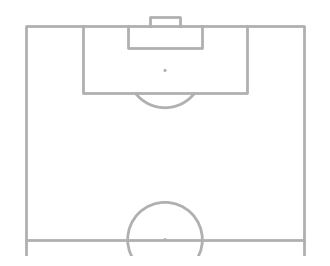

In [162]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(pitch_type='uefa', half=True, goal_type='box')
pitch.draw(ax = ax)

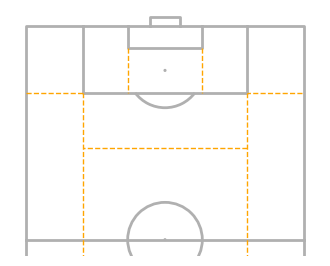

In [163]:
# create four verticle lines
# ax.plot([13.84, 13.84], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
# ax.plot([54.16, 54.16], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
# ax.plot([24.84, 24.84], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
# ax.plot([43.16, 43.16], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')

# create three horizontal lines
# ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [88.5,88.5], ls='--', color='red')
# ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [99.5,99.5], ls='--', color='red')
# ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [75,75], ls='--', color='red')

# vertical lines
ax.plot([13.84, 13.84], [40, 88.5], ls='--', color='orange', lw=1)
ax.plot([54.16, 54.16], [40, 88.5], ls='--', color='orange', lw=1)
ax.plot([24.84, 24.84], [99.5, 88.5], ls='--', color='orange', lw=1)
ax.plot([43.16, 43.16], [99.5, 88.5], ls='--', color='orange', lw=1)

# horizontal lines
ax.plot([68, 54.16], [88.5,88.5], ls='--', color='orange', lw=1)
ax.plot([0.5, 13.84], [88.5,88.5], ls='--', color='orange', lw=1)
ax.plot([13.84, 54.16], [75,75], ls='--', color='orange', lw=1)

fig

In [164]:
zone_areas = {
    'zone_1':{
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_2':{
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_3':{
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_4':{
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_5':{
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_6':{
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_7':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 99.5,
    },
    'zone_8':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 99.5, 'y_upper_bound': 105,
    },
    'zone_9':{
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_10':{
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_11':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_12':{
        'x_lower_bound': 13.84, 'x_upper_bound': 54.16,
        'y_lower_bound': 20, 'y_upper_bound': 75,
    }
}

In [165]:
def assign_shot_zone(x,y):
    '''
    This function returns the zone based on the x & y coordinates of the shot
    taken.
    Args:
        - x (float): the x position of the shot based on a vertical grid.
        - y (float): the y position of the shot based on a vertical grid.
    '''

    global zone_areas

    # Conditions

    for zone in zone_areas:
        if (x >= zone_areas[zone]['x_lower_bound']) & (x <= zone_areas[zone]['x_upper_bound']):
            if (y >= zone_areas[zone]['y_lower_bound']) & (y <= zone_areas[zone]['y_upper_bound']):
                return zone

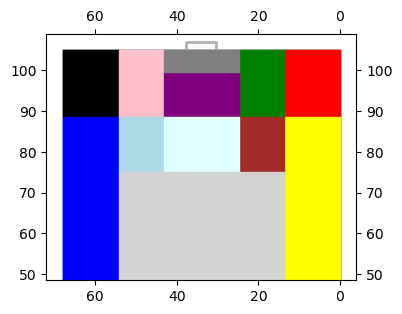

In [166]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

zone_colors = {
    'zone_1': 'black',
    'zone_2': 'red',
    'zone_3': 'blue',
    'zone_4': 'yellow',
    'zone_5': 'green',
    'zone_6': 'pink',
    'zone_7': 'purple',
    'zone_8': 'grey',
    'zone_9': 'brown',
    'zone_10': 'lightblue',
    'zone_11': 'lightcyan',
    'zone_12': 'lightgrey'
}

for zone in zone_colors:
    x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
    y1 = zone_areas[zone]['y_lower_bound']
    y2 = zone_areas[zone]['y_upper_bound']
    ax.fill_between(x=x_lim, y1=y1, y2=y2, color=zone_colors[zone]) 

In [167]:
df

,xdest,xpos,header,next_player,game_time,ypos,xg,ydest,player,penalty,...,xp,throw_in,external_id,start_time,xt,one_touch,foot_used,attack_type,corner_outcome,goal_mouth
17,NaN,102.90,False,NaN,2,18.36,NaN,NaN,Victor Edvardsen,False,...,NaN,False,17,68,NaN,NaN,NaN,NaN,NaN,NaN
24,98.0,101.85,False,NaN,2,19.04,NaN,3.0,Victor Edvardsen,False,...,0.546538,False,24,77,NaN,NaN,NaN,NaN,NaN,NaN
58,41.0,45.15,False,Abdelrahman Saidi,4,58.48,NaN,78.0,Victor Edvardsen,False,...,0.786773,False,58,228,-0.001412,NaN,NaN,NaN,NaN,NaN
72,68.0,71.40,False,NaN,5,41.48,NaN,61.0,Victor Edvardsen,False,...,0.239932,False,72,274,NaN,NaN,NaN,NaN,NaN,NaN
238,45.0,57.75,False,Nikola Djurdjic,13,44.88,NaN,51.0,Victor Edvardsen,False,...,0.855379,False,238,767,-0.001713,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,55.0,99.75,False,NaN,91,6.80,NaN,92.0,Victor Edvardsen,False,...,0.640519,False,1552,5409,NaN,NaN,NaN,NaN,NaN,NaN
1553,55.0,99.75,False,NaN,91,6.80,NaN,92.0,Victor Edvardsen,False,...,0.640519,False,1553,5409,NaN,NaN,NaN,NaN,NaN,NaN
1567,46.0,57.75,False,Johan Bertilsson,92,17.00,NaN,22.0,Victor Edvardsen,False,...,0.821262,False,1567,5460,-0.003384,NaN,NaN,NaN,NaN,NaN
1569,44.0,58.80,False,Johan Bertilsson,92,13.60,NaN,18.0,Victor Edvardsen,False,...,0.849898,False,1569,5465,-0.002566,NaN,NaN,NaN,NaN,NaN


In [168]:

# invert x and y values since we use a vertical pitch
df.columns = [column if column not in ['xpos', 'ypos'] else 'ypos' if column == 'xpos' else 'xpos' for column in df.columns]

# only include actions if it's either a Goal or a Shot
df = df[df['action'].isin(['Goal', 'Shot'])]

In [169]:
# to overcome the "SettingWithCopyWarning"
df = df.copy()
df.loc[:, 'zone_area'] = [assign_shot_zone(x, y) for x, y in zip(df['xpos'], df['ypos'])]

In [170]:
df

,xdest,ypos,header,next_player,game_time,xpos,xg,ydest,player,penalty,...,throw_in,external_id,start_time,xt,one_touch,foot_used,attack_type,corner_outcome,goal_mouth,zone_area
267,NaN,99.75,False,NaN,15,22.44,0.15629,NaN,Victor Edvardsen,False,...,False,267,842,NaN,NaN,Right Foot,NaN,NaN,NaN,zone_5
830,NaN,92.40,False,NaN,48,34.00,0.816865,NaN,Victor Edvardsen,True,...,False,830,2851,NaN,NaN,NaN,Penalty,NaN,Bottom-Left,zone_7
83,NaN,90.30,False,NaN,5,34.68,0.114546,NaN,Victor Edvardsen,False,...,False,83,273,NaN,True,Right Foot,Free-kick,NaN,NaN,zone_7
469,NaN,85.05,False,NaN,24,48.96,0.016764,NaN,Victor Edvardsen,False,...,False,469,1383,NaN,NaN,Right Foot,NaN,NaN,NaN,zone_10
1279,NaN,94.50,False,NaN,71,45.56,0.069211,NaN,Victor Edvardsen,False,...,False,1279,4221,NaN,NaN,Right Foot,NaN,NaN,NaN,zone_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,NaN,93.45,False,NaN,81,50.32,0.019775,NaN,Victor Edvardsen,False,...,False,1582,4824,NaN,True,Right Foot,NaN,NaN,NaN,zone_6
141,NaN,87.15,False,NaN,12,48.96,0.02213,NaN,Victor Edvardsen,False,...,False,141,674,NaN,NaN,Right Foot,NaN,NaN,NaN,zone_10
421,NaN,100.80,False,NaN,25,42.16,0.103188,NaN,Victor Edvardsen,False,...,False,421,1493,NaN,NaN,NaN,NaN,NaN,Bottom-Center,zone_8
1311,NaN,93.45,False,NaN,76,20.40,0.040762,NaN,Victor Edvardsen,False,...,False,1311,4556,NaN,NaN,Right Foot,NaN,NaN,NaN,zone_5


In [171]:
# Group by the action column and see how many events we can expect from a goal or a shot
# grouped_data = df.groupby('action')['action'].count()
# grouped_data

In [172]:
# Group the data by 'player', 'team', and 'zone_area', and count the number of shots for each group.
# Rename the count column to 'num_shots'.
data = df.groupby(['player', 'team', 'zone_area']).apply(lambda x: x.shape[0]).reset_index()
data.rename(columns={0:'num_shots'}, inplace=True)

# Calculate the total number of shots for each player by grouping the 'data' DataFrame by 'player' and summing the 'num_shots' column.
# Rename the 'num_shots' column to 'total_shots'.
total_shots = data.groupby(['player'])['num_shots'].sum().reset_index()
total_shots.rename(columns={'num_shots':'total_shots'}, inplace=True)

# Merge the 'data' DataFrame with the 'total_shots' DataFrame based on the 'player' column.
# Calculate the percentage of shots for each player by dividing the 'num_shots' column by the 'total_shots' column and store it in the 'pct_shots' column.
data = pd.merge(data, total_shots, on='player', how='left')
data['pct_shots'] = data['num_shots']/data['total_shots']

In [173]:
data

,player,team,zone_area,num_shots,total_shots,pct_shots
0,Victor Edvardsen,Degerfors IF,zone_1,1,81,0.012346
1,Victor Edvardsen,Degerfors IF,zone_10,12,81,0.148148
2,Victor Edvardsen,Degerfors IF,zone_11,8,81,0.098765
3,Victor Edvardsen,Degerfors IF,zone_12,1,81,0.012346
4,Victor Edvardsen,Degerfors IF,zone_5,9,81,0.111111
5,Victor Edvardsen,Degerfors IF,zone_6,17,81,0.209877
6,Victor Edvardsen,Degerfors IF,zone_7,27,81,0.333333
7,Victor Edvardsen,Degerfors IF,zone_8,2,81,0.024691
8,Victor Edvardsen,Degerfors IF,zone_9,4,81,0.049383


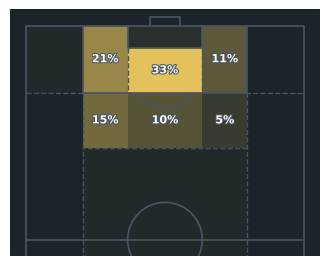

In [186]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)

pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    goal_type='box',
    linewidth=1.25,
    pitch_color = '#1b2429',
    line_color='#495464',
    spot_scale=0.0
)
pitch.draw(ax = ax)

plot_df = data[data['player'] == player]
max_value = plot_df['pct_shots'].max()
team_name = plot_df['team'].iloc[0]

# vertical lines
ax.plot([13.84, 13.84], [40, 88.5], ls='--', color='#495464', lw=1)
ax.plot([54.16, 54.16], [40, 88.5], ls='--', color='#495464', lw=1)
ax.plot([24.84, 24.84], [99.5, 88.5], ls='--', color='#495464', lw=1)
ax.plot([43.16, 43.16], [99.5, 88.5], ls='--', color='#495464', lw=1)

# horizontal lines
ax.plot([68, 54.16], [88.5,88.5], ls='--', color='#495464', lw=1)
ax.plot([0.5, 13.84], [88.5,88.5], ls='--', color='#495464', lw=1)
ax.plot([13.84, 54.16], [75,75], ls='--', color='#495464', lw=1)


# iterates over each unique value in the 'zone_area' column of the DataFrame plot_df
# 
for zone in plot_df['zone_area']:
    # extracts the 'pct_shots' value from the first row of plot_df where the 'zone_area' matches the current 'zone' value.
    # It assigns this value to the variable shot_pct, representing the shot percentage for the current zone.
    shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_shots'].iloc[0]
    # retrieves the lower and upper bounds of the x-axis for the current 'zone' from the dictionary zone_areas.
    # It assigns these values to the list x_lim, representing the x-axis limits for the current zone.
    x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
    # retrieve the lower and upper bounds of the y-axis for the current 'zone' from the dictionary zone_areas.
    # They assign these values to variables y1 and y2, representing the y-axis limits for the current zone.
    y1 = zone_areas[zone]['y_lower_bound']
    y2 = zone_areas[zone]['y_upper_bound']
    # fills the area between the x-axis limits x_lim and the y-axis limits y1 and y2 with a specific color ('#DA70D6').
    # The transparency (alpha) of the filled area is determined by shot_pct divided by max_value.
    # The zorder determines the order in which the filled area is drawn in relation to other plot elements.
    # The ec parameter is set to 'None', indicating that there should be no edge color for the filled area.
    ax.fill_between(
        x=x_lim, 
        y1=y1, y2=y2, 
        color='#E3C25B', alpha=(shot_pct/max_value),
        zorder=0, ec='None')
    #  checks if the shot percentage (shot_pct) for the current zone is greater than 0.05
    # calculate the x and y coordinates for the annotation text.
    # The x-coordinate (x_pos) is set to the midpoint between the lower and upper x-axis bounds (x_lim).
    # The y-coordinate (y_pos) is set to the midpoint between the lower and upper y-axis bounds (y1 and y2).
    if shot_pct >= 0.03:
        x_pos = x_lim[0] + abs(x_lim[0] - x_lim[1])/2
        y_pos = y1 + abs(y1 - y2)/2
        text_ = ax.annotate(
            xy=(x_pos, y_pos),
            text=f'{shot_pct:.0%}',
            ha='center',
            va='center',
            color='white',
            weight='bold',
            size=8
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground='#495464'), path_effects.Normal()]
        )

plt.savefig(
    "C:/Users/al.eriksson/Documents/Python/Football/ShotLocPlayer.jpg",
    dpi = 600,
    facecolor = "#1b2429",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)